In [1]:
# import packages
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# fetch data sets
titanic_df = pd.read_csv('C:/Users/ashle/GirlsInAI/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


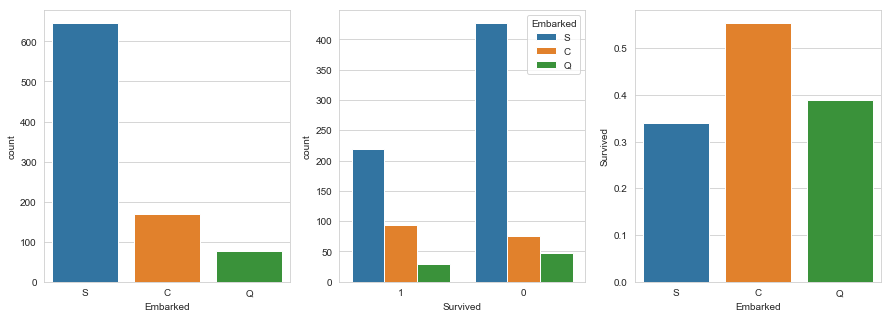

In [10]:
# inspect variable 'Embarked'

# fill the two missing values with the most occurred value, "S"
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
sns.factorplot('Embarked','Survived',data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# 1. plot Embarked frequency count
sns.countplot(x='Embarked',data=titanic_df,ax=axis1)
# 2. plot Survived based on Embarked
sns.countplot(x='Survived',hue='Embarked',data=titanic_df,order=[1,0],ax=axis2)
# 3. grouped by embarked, plot the frequency of each in all survived
embark_perc = titanic_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked',y='Survived',data=embark_perc,order=['S','C','Q'],ax=axis3)

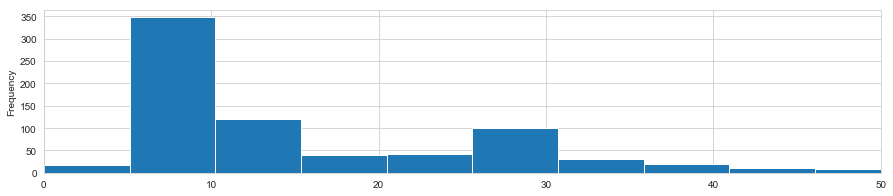

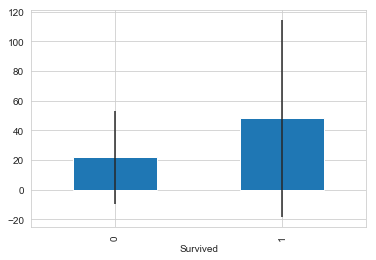

In [13]:
# inspect variable 'Fare'

# convert data type
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
# fetch fare
fare_not_survived = titanic_df['Fare'][titanic_df['Survived']==0]
fare_survived = titanic_df['Fare'][titanic_df['Survived']==1]
average_fare = DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(),fare_survived.std()])
# plot
# 1. frequency count
titanic_df['Fare'].plot(kind='hist',figsize=(15,3),bins=100,xlim=(0,50))
# 2. boxplot based on 'survived'
average_fare.index.names = std_fare.index.names = ['Survived']
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

NameError: name 'rand_1' is not defined

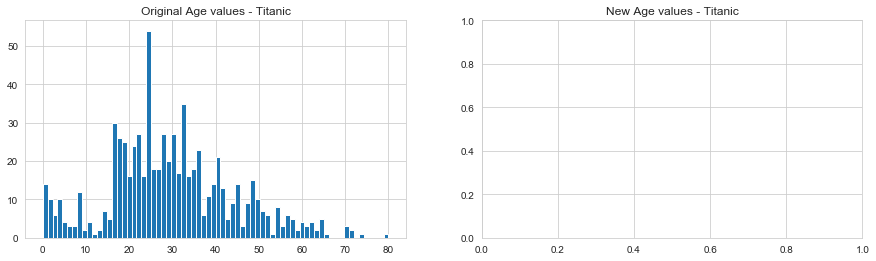

In [14]:
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')
# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
titanic_df['Age'] = titanic_df['Age'].astype(int)
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)